In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [0]:
sess = tf.Session()

thetas = tf.Variable(initial_value=np.zeros(100), name='theta', dtype=tf.float32, trainable=True)
ps = tf.exp(thetas) / tf.reduce_sum(tf.exp(thetas))

data = tf.placeholder(name='data', dtype=np.int32)
loss = tf.reduce_mean(-tf.log(tf.gather(ps, data)) * np.log2(np.e))

In [0]:
opt = tf.train.AdamOptimizer(learning_rate=0.001)
train_step = opt.minimize(loss)
sess.run(tf.global_variables_initializer())

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(sample_data())

In [0]:
losses = []
val_losses = []

for i in range(5000):
    random_datapoint = np.random.choice(train, size=1024)
    _, loss_result = sess.run([train_step, loss], feed_dict={data: random_datapoint})
    losses.append(loss_result)
    
    if i % 100 == 0:
        val_loss = sess.run(loss, feed_dict={data: val})
        val_losses.append(val_loss)
        
print('Final validation loss: {}'.format(val_losses[-1]))

Final validation loss: 5.845905780792236


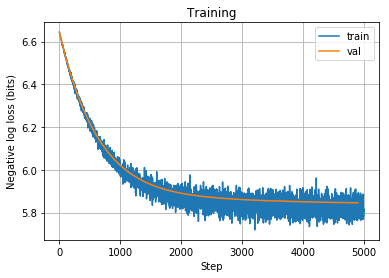

In [0]:
plt.plot(np.arange(len(losses)), losses, label='train')
plt.plot(np.arange(0, len(val_losses) * 100, 100), val_losses, label='val')
plt.title('Training')
plt.xlabel('Step')
plt.ylabel('Negative log loss (bits)')
plt.legend()
plt.grid(True)

In [0]:
ps_final = sess.run(ps)

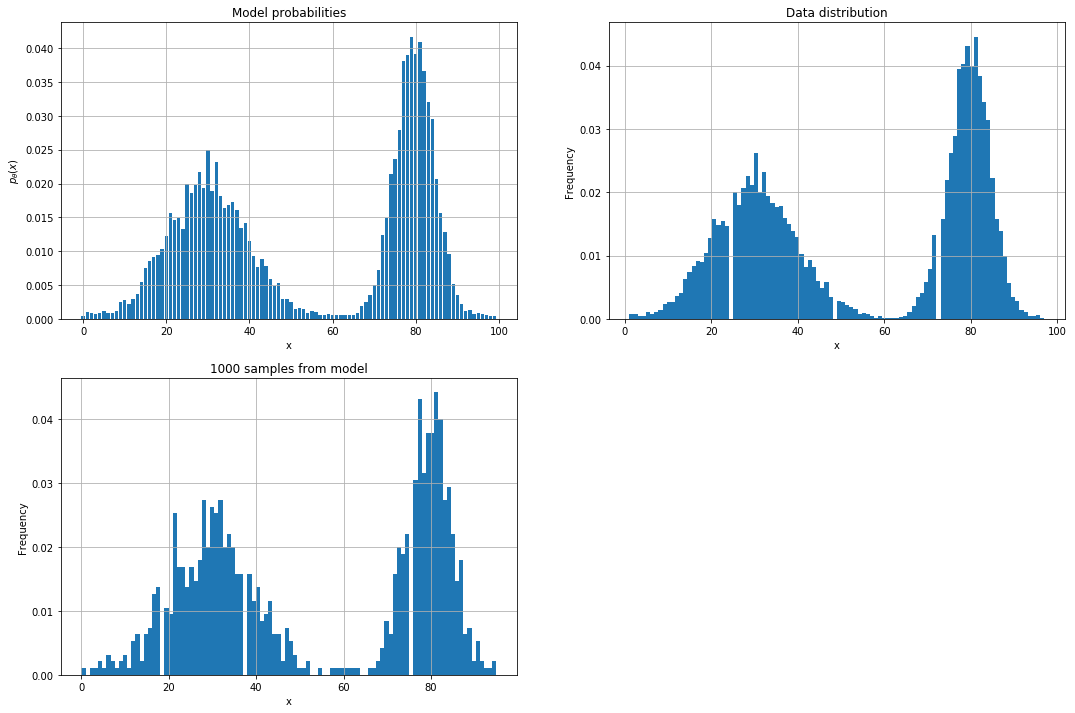

In [0]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.bar(np.arange(len(ps_final)), ps_final)
plt.title('Model probabilities')
plt.xlabel('x')
plt.ylabel('$p_{\\theta}(x)$')
plt.grid(True)

plt.subplot(222)
plt.hist(sample_data(), bins=100, density=True)
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(223)
samples = np.random.choice(np.arange(100), p=ps_final, size=1000)
plt.hist(samples, bins=100, density=True)
plt.title('1000 samples from model')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)